# 一、函数与前期准备 

### 1.导入库

In [25]:
from pylab import *
#from numpy import *
import pywt
import operator
import math
import random
import copy
import time
import scipy.io as scio
from itertools import chain

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 2.小波包能量特征提取函数

In [26]:
def nl_tz():
    n = 3
    re = []  #第n层所有节点的分解系数
    for i in [node.path for node in wp.get_level(n, 'freq')]:
        re.append(wp[i].data)
#第n层能量特征
    for i in re:
        energy.append(pow(np.linalg.norm(i,ord=None),2))

### 3.FCM程序

In [38]:
def fcm(data,c,m,Epsilon):
    U=np.random.rand(data.shape[0],c)
    U/=np.sum(U,axis=1,keepdims=True)
    while True:
        U_new=np.zeros_like(U)
        C=(U**m/np.sum(U**m,axis=0,keepdims=True)).T@data
        for i in range(data.shape[0]):
            tmp=np.linalg.norm(C-data[i],ord=2,axis=1)**(2/(m-1))
            U_new[i]=1.0/np.sum(tmp.reshape(-1,1)@(1/tmp.reshape(1,-1)),axis=1)
        if np.abs(U_new - U).max()<Epsilon:
            return U,np.argmax(U,axis=1)
        U=U_new

#U,R=fcm(data,c,m,Epsilon)
#R

# 二、Bearing 2_1内圈

### 1.特征提取与降维

In [110]:
energy= []
for i in range(1,492):
    dt=pd.read_csv("D:\\baiduyundownload\\XJTU-SY_Bearing_Datasets\\Data\\XJTU-SY_Bearing_Datasets\\37.5Hz11kN\\Bearing2_1\\{}.csv".format(i))
    ecg=dt["Horizontal_vibration_signals"]
    wp = pywt.WaveletPacket(data=ecg, wavelet='sym5', mode='symmetric',maxlevel=3)
    nl_tz()
#len(energy)
data_in=np.array(energy).reshape([491,8])
data_in

array([[2.62563071e+03, 1.41057106e+03, 2.74988750e+02, ...,
        5.63500133e+02, 2.10805207e+02, 8.10635341e+01],
       [2.41622700e+03, 1.46987258e+03, 3.01618951e+02, ...,
        4.74001278e+02, 2.08426321e+02, 9.19516658e+01],
       [2.32108025e+03, 1.31945803e+03, 2.86636437e+02, ...,
        5.38960377e+02, 2.14320728e+02, 8.39453591e+01],
       ...,
       [4.27481944e+05, 2.18672455e+05, 3.05829550e+04, ...,
        5.76772076e+04, 2.30087708e+04, 4.29088325e+03],
       [8.17081157e+05, 3.63055108e+05, 4.94841934e+04, ...,
        7.38144787e+04, 2.62883421e+04, 5.42455716e+03],
       [9.53390037e+05, 4.16562323e+05, 5.24714607e+04, ...,
        7.33728233e+04, 2.59812842e+04, 5.66715614e+03]])

In [111]:
#先得到贡献率
pca = PCA(n_components=4)#mle为自动获取的，对比降到3维和4维的区别
pca.fit(data_in)#训练
in_ratio=pca.explained_variance_ratio_
in_ratio
#可以看出前三位贡献率之和为97.96%,前四位之和为99.68%

array([9.90622720e-01, 4.96918934e-03, 4.37077124e-03, 1.85996084e-05])

In [112]:
#读取降维后的数据
data_i = pca.fit_transform(data_in)
data_i.shape

(491, 4)

### 2.得到隶属度矩阵

In [113]:
data=data_i
U,R=fcm(data,2,m,Epsilon)
U

array([[9.99945597e-01, 5.44030511e-05],
       [9.99941980e-01, 5.80199310e-05],
       [9.99939763e-01, 6.02369549e-05],
       [9.99943975e-01, 5.60249091e-05],
       [9.99946022e-01, 5.39777053e-05],
       [9.99941630e-01, 5.83698982e-05],
       [9.99942584e-01, 5.74155352e-05],
       [9.99942551e-01, 5.74489469e-05],
       [9.99940530e-01, 5.94703382e-05],
       [9.99942974e-01, 5.70264443e-05],
       [9.99940622e-01, 5.93778326e-05],
       [9.99947682e-01, 5.23181911e-05],
       [9.99942096e-01, 5.79035340e-05],
       [9.99951248e-01, 4.87522553e-05],
       [9.99947035e-01, 5.29645721e-05],
       [9.99943645e-01, 5.63553554e-05],
       [9.99945514e-01, 5.44864625e-05],
       [9.99945687e-01, 5.43130928e-05],
       [9.99941094e-01, 5.89059419e-05],
       [9.99946358e-01, 5.36420465e-05],
       [9.99944656e-01, 5.53435921e-05],
       [9.99943787e-01, 5.62132313e-05],
       [9.99944871e-01, 5.51290268e-05],
       [9.99942948e-01, 5.70516493e-05],
       [9.999451

In [120]:
U_in=np.array(U)
normal_in=U_in[:,0]



### 3.画隶属度变化图

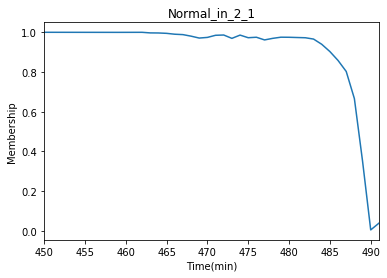

In [121]:
plt.xlabel("Time(min)")
plt.ylabel("Membership")
plt.title("Normal_in_2_1")
plt.xlim(450,491)
x=range(1,492)
y=normal_in
plt.plot(x,y)
plt.show()

## 三、Bearing 2_3保持架

### 1.得到隶属度矩阵

In [108]:
energy= []
for i in range(1,534):
    dt=pd.read_csv("D:\\baiduyundownload\\XJTU-SY_Bearing_Datasets\\Data\\XJTU-SY_Bearing_Datasets\\37.5Hz11kN\\Bearing2_3\\{}.csv".format(i))
    ecg=dt["Horizontal_vibration_signals"]
    wp = pywt.WaveletPacket(data=ecg, wavelet='sym5', mode='symmetric',maxlevel=3)
    nl_tz()
#len(energy)
data_baochi=np.array(energy).reshape([533,8])
#先得到贡献率
pca = PCA(n_components=4)#mle为自动获取的，对比降到3维和4维的区别
pca.fit(data_baochi)#训练
baochi_ratio=pca.explained_variance_ratio_
#可以看出前三位贡献率之和为97.96%,前四位之和为99.68%
#读取降维后的数据
data_bao = pca.fit_transform(data_baochi)
#data_bao.shape
data=data_bao
U,R=fcm(data,2,m,Epsilon)
U

array([[9.99386329e-01, 6.13670920e-04],
       [9.99402615e-01, 5.97385370e-04],
       [9.99398318e-01, 6.01681525e-04],
       ...,
       [1.12934019e-01, 8.87065981e-01],
       [3.29750028e-02, 9.67024997e-01],
       [2.28317007e-01, 7.71682993e-01]])

### 2.画隶属度图

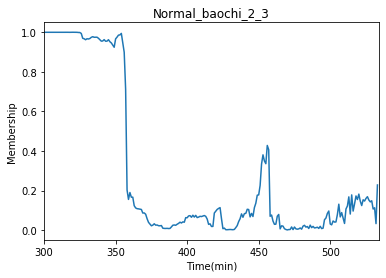

In [109]:
U_bao=np.array(U)
normal_bao=U_bao[:,0]
#bad_in=U_in[:,0]
normal_bao
#画图
plt.xlabel("Time(min)")
plt.ylabel("Membership")
plt.title("Normal_baochi_2_3")
plt.xlim(300,534)
x=range(1,534)
y=normal_bao
plt.plot(x,y)
plt.show()

## 四、Bearing 2_5外圈

In [106]:
energy= []
for i in range(1,340):
    dt=pd.read_csv("D:\\baiduyundownload\\XJTU-SY_Bearing_Datasets\\Data\\XJTU-SY_Bearing_Datasets\\37.5Hz11kN\\Bearing2_5\\{}.csv".format(i))
    ecg=dt["Horizontal_vibration_signals"]
    wp = pywt.WaveletPacket(data=ecg, wavelet='sym5', mode='symmetric',maxlevel=3)
    nl_tz()
#len(energy)
data_out=np.array(energy).reshape([339,8])
#先得到贡献率
pca = PCA(n_components=4)#mle为自动获取的，对比降到3维和4维的区别
pca.fit(data_out)#训练
out_ratio=pca.explained_variance_ratio_
#可以看出前三位贡献率之和为97.96%,前四位之和为99.68%
#读取降维后的数据
data_o = pca.fit_transform(data_out)
#data_bao.shape
data=data_o
U,R=fcm(data,2,m,Epsilon)
U

array([[5.65854729e-03, 9.94341453e-01],
       [5.87628782e-03, 9.94123712e-01],
       [5.57716301e-03, 9.94422837e-01],
       [5.69449773e-03, 9.94305502e-01],
       [5.56467098e-03, 9.94435329e-01],
       [5.54280784e-03, 9.94457192e-01],
       [5.71223725e-03, 9.94287763e-01],
       [5.69427681e-03, 9.94305723e-01],
       [5.47369776e-03, 9.94526302e-01],
       [5.70494910e-03, 9.94295051e-01],
       [5.60842148e-03, 9.94391579e-01],
       [5.65711756e-03, 9.94342882e-01],
       [5.81356384e-03, 9.94186436e-01],
       [5.71432276e-03, 9.94285677e-01],
       [5.91481880e-03, 9.94085181e-01],
       [6.02857529e-03, 9.93971425e-01],
       [5.89137971e-03, 9.94108620e-01],
       [6.03839204e-03, 9.93961608e-01],
       [6.00017796e-03, 9.93999822e-01],
       [5.96049234e-03, 9.94039508e-01],
       [5.90105200e-03, 9.94098948e-01],
       [5.77110901e-03, 9.94228891e-01],
       [6.03052101e-03, 9.93969479e-01],
       [6.03553523e-03, 9.93964465e-01],
       [6.012435

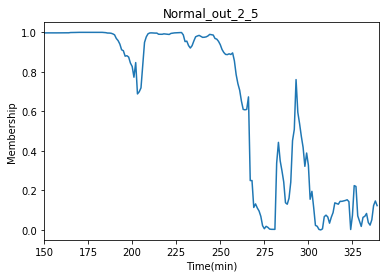

In [107]:
U_out=np.array(U)
normal_out=U_out[:,1]
#bad_in=U_in[:,0]
#normal_out
#画图
plt.xlabel("Time(min)")
plt.ylabel("Membership")
plt.title("Normal_out_2_5")
plt.xlim(150,340)
x=range(1,340)
y=normal_out
plt.plot(x,y)
plt.show()

## 五、Bearing 2_4外圈

In [95]:
energy= []
for i in range(1,43):
    dt=pd.read_csv("D:\\baiduyundownload\\XJTU-SY_Bearing_Datasets\\Data\\XJTU-SY_Bearing_Datasets\\37.5Hz11kN\\Bearing2_4\\{}.csv".format(i))
    ecg=dt["Horizontal_vibration_signals"]
    wp = pywt.WaveletPacket(data=ecg, wavelet='sym5', mode='symmetric',maxlevel=3)
    nl_tz()
#len(energy)
data_out4=np.array(energy).reshape([42,8])
#先得到贡献率
pca = PCA(n_components=4)#mle为自动获取的，对比降到3维和4维的区别
pca.fit(data_out4)#训练
out4_ratio=pca.explained_variance_ratio_
#可以看出前三位贡献率之和为97.96%,前四位之和为99.68%
#读取降维后的数据
data_o4 = pca.fit_transform(data_out4)
#data_bao.shape
data=data_o4
U,R=fcm(data,2,m,Epsilon)
U

array([[1.22805554e-03, 9.98771944e-01],
       [1.27331931e-03, 9.98726681e-01],
       [1.33665028e-03, 9.98663350e-01],
       [1.32306421e-03, 9.98676936e-01],
       [1.32509892e-03, 9.98674901e-01],
       [1.27869985e-03, 9.98721300e-01],
       [1.27838219e-03, 9.98721618e-01],
       [1.26722004e-03, 9.98732780e-01],
       [1.25585292e-03, 9.98744147e-01],
       [1.13329114e-03, 9.98866709e-01],
       [1.16640047e-03, 9.98833600e-01],
       [1.13570337e-03, 9.98864297e-01],
       [1.07947365e-03, 9.98920526e-01],
       [1.01181269e-03, 9.98988187e-01],
       [1.05666373e-03, 9.98943336e-01],
       [9.95589138e-04, 9.99004411e-01],
       [1.00392269e-03, 9.98996077e-01],
       [9.84471584e-04, 9.99015528e-01],
       [9.63473669e-04, 9.99036526e-01],
       [9.39568660e-04, 9.99060431e-01],
       [9.50128717e-04, 9.99049871e-01],
       [9.12982490e-04, 9.99087018e-01],
       [1.00502613e-03, 9.98994974e-01],
       [9.27540947e-04, 9.99072459e-01],
       [8.764332

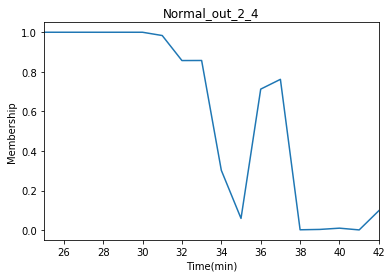

In [104]:
U_out4=np.array(U)
normal_out4=U_out4[:,1]
#bad_in=U_in[:,0]
#normal_out4
#画图
plt.xlabel("Time(min)")
plt.ylabel("Membership")
plt.title("Normal_out_2_4")
plt.xlim(25,42)
x=range(1,43)
y=normal_out4
plt.plot(x,y)
plt.show()

## 六、Bearing 2_2外圈

In [122]:
energy= []
for i in range(1,162):
    dt=pd.read_csv("D:\\baiduyundownload\\XJTU-SY_Bearing_Datasets\\Data\\XJTU-SY_Bearing_Datasets\\37.5Hz11kN\\Bearing2_2\\{}.csv".format(i))
    ecg=dt["Horizontal_vibration_signals"]
    wp = pywt.WaveletPacket(data=ecg, wavelet='sym5', mode='symmetric',maxlevel=3)
    nl_tz()
#len(energy)
data_out2=np.array(energy).reshape([161,8])
#先得到贡献率
pca = PCA(n_components=4)#mle为自动获取的，对比降到3维和4维的区别
pca.fit(data_out2)#训练
out2_ratio=pca.explained_variance_ratio_
#可以看出前三位贡献率之和为97.96%,前四位之和为99.68%
#读取降维后的数据
data_o2 = pca.fit_transform(data_out2)
#data_bao.shape
data=data_o2
U,R=fcm(data,2,m,Epsilon)
U

array([[1.56344574e-02, 9.84365543e-01],
       [1.56422075e-02, 9.84357792e-01],
       [1.55483925e-02, 9.84451608e-01],
       [1.56082424e-02, 9.84391758e-01],
       [1.57070758e-02, 9.84292924e-01],
       [1.56400229e-02, 9.84359977e-01],
       [1.56353835e-02, 9.84364617e-01],
       [1.55823272e-02, 9.84417673e-01],
       [1.56156107e-02, 9.84384389e-01],
       [1.56130109e-02, 9.84386989e-01],
       [1.56296435e-02, 9.84370356e-01],
       [1.56091991e-02, 9.84390801e-01],
       [1.56766663e-02, 9.84323334e-01],
       [1.55155365e-02, 9.84484464e-01],
       [1.56823801e-02, 9.84317620e-01],
       [1.55634378e-02, 9.84436562e-01],
       [1.56941988e-02, 9.84305801e-01],
       [1.57304439e-02, 9.84269556e-01],
       [1.56132631e-02, 9.84386737e-01],
       [1.56386721e-02, 9.84361328e-01],
       [1.56200533e-02, 9.84379947e-01],
       [1.55068945e-02, 9.84493105e-01],
       [1.55945800e-02, 9.84405420e-01],
       [1.57410558e-02, 9.84258944e-01],
       [1.559604

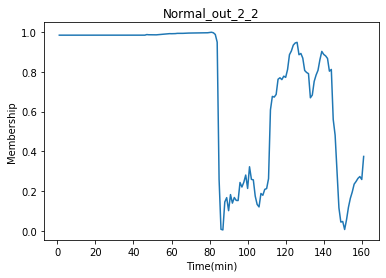

In [123]:
U_out2=np.array(U)
normal_out2=U_out2[:,1]
#bad_in=U_in[:,0]
#normal_out4
#画图
plt.xlabel("Time(min)")
plt.ylabel("Membership")
plt.title("Normal_out_2_2")
#plt.xlim(25,42)
x=range(1,162)
y=normal_out2
plt.plot(x,y)
plt.show()